In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("data/Ames_Housing_Data.tsv", sep="\t", delim_whitespace=False)

In [3]:
df.rename(lambda x: x.replace(" ","_") if " " in x else x, axis=1, inplace=True)

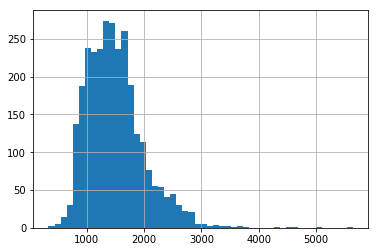

In [4]:
df.Gr_Liv_Area.hist(bins=50)

In [5]:
data = df.copy()

In [6]:
df = df.loc[df.Gr_Liv_Area < 4000]

In [7]:
df = df.drop(["PID","Order"],axis=1)

In [8]:
# ONE-HOT encoding: string variables to multiple colums with 0,1 values

ohe = df.select_dtypes("object").columns
pd.get_dummies(df[ohe], ohe.to_list()).describe()

,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,0.000684,0.008547,0.047521,0.000684,0.009231,0.775385,0.157949,0.004103,0.995897,0.041026,...,0.080684,0.002393,0.000342,0.866325,0.064615,0.004103,0.008205,0.015726,0.824615,0.082735
std,0.026144,0.092070,0.212788,0.026144,0.095649,0.417400,0.364755,0.063931,0.063931,0.198383,...,0.272395,0.048870,0.018490,0.340361,0.245888,0.063931,0.090225,0.124437,0.380361,0.275528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Skew
serie_skew = df.skew()
serie_skew = serie_skew[abs(serie_skew) > 0.75]

In [10]:
serie_skew.sort_values()

BsmtFin_SF_1        0.821985
2nd_Flr_SF          0.847517
Gr_Liv_Area         0.878879
Bsmt_Unf_SF         0.925021
1st_Flr_SF          0.942615
Lot_Frontage        1.111071
MS_SubClass         1.356549
SalePrice           1.591072
Wood_Deck_SF        1.848286
Open_Porch_SF       2.495162
Mas_Vnr_Area        2.565458
Screen_Porch        3.953495
Bsmt_Half_Bath      3.965970
Enclosed_Porch      4.010586
BsmtFin_SF_2        4.135900
Kitchen_AbvGr       4.309573
3Ssn_Porch         11.393854
Low_Qual_Fin_SF    12.107629
Lot_Area           13.200004
Pool_Area          18.743766
Misc_Val           22.225015
dtype: float64

/home/pan/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pan/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


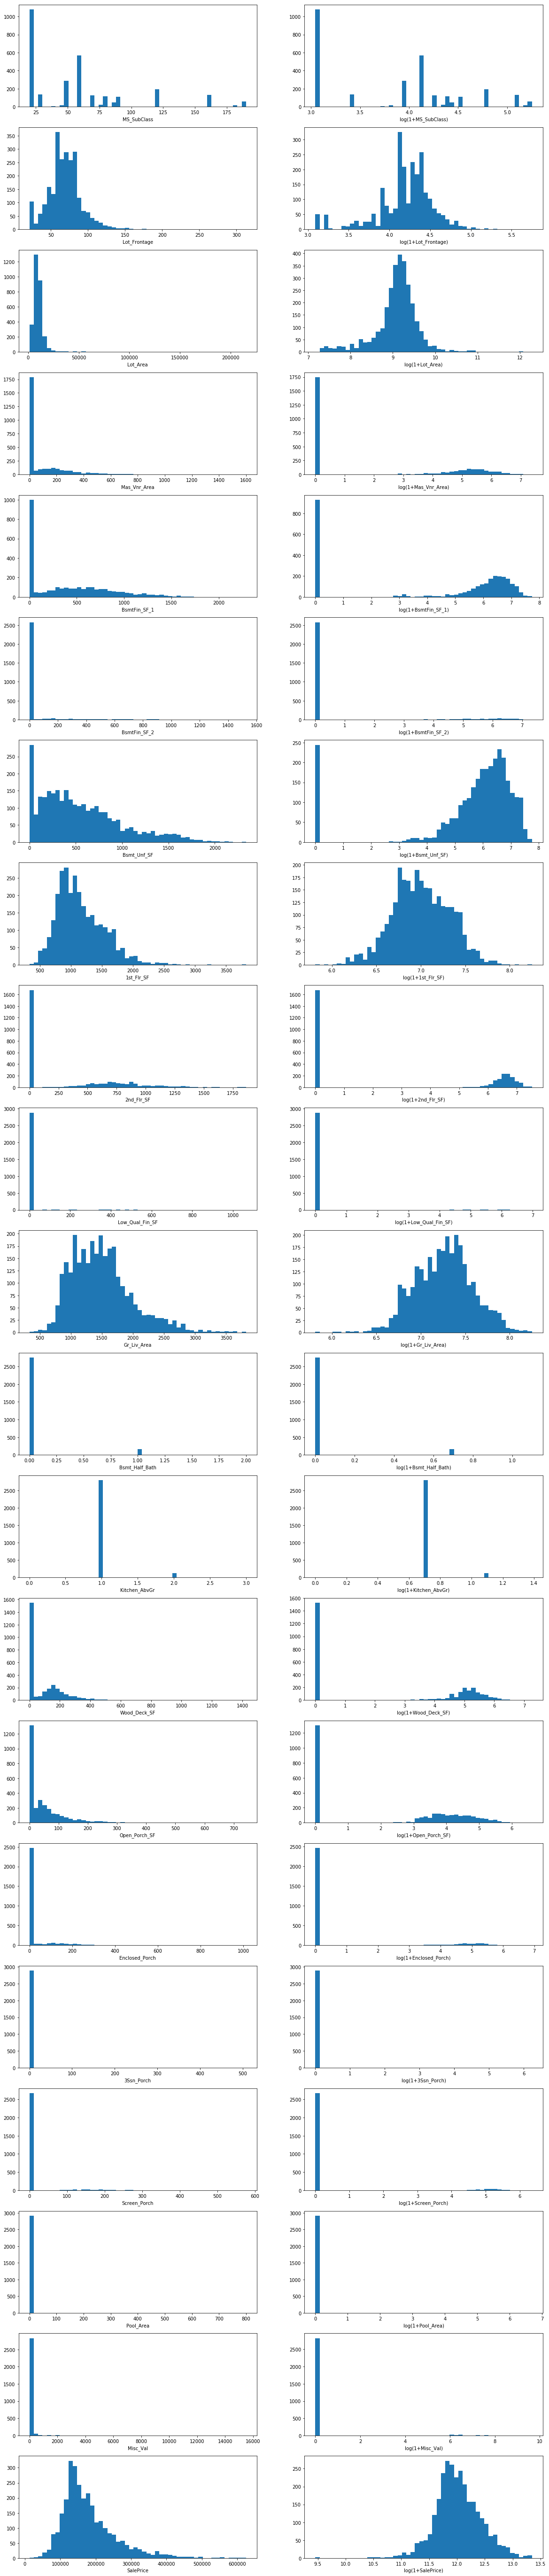

In [11]:
features = serie_skew.index.to_list()
#fig, axis = plt.subplots(len(features),2, figsize=(10,50))
#df[features].hist(bins=50).flatten()
fig, axis = plt.subplots(len(features),2, figsize=(20,100))

for idx,f in enumerate(features):
    axis[idx,0].hist(df[f], bins=50)
    axis[idx,0].set_xlabel(f)
    axis[idx,1].hist(np.log1p(df[f]), bins=50)
    axis[idx,1].set_xlabel('log(1+{})'.format(f))
    
plt.show()

# it does not look a really good transformation

In [12]:
df.notnull().sum().loc[lambda s: s > 2000]

MS_SubClass       2925
MS_Zoning         2925
Lot_Frontage      2435
Lot_Area          2925
Street            2925
                  ... 
Mo_Sold           2925
Yr_Sold           2925
Sale_Type         2925
Sale_Condition    2925
SalePrice         2925
Length: 75, dtype: int64

In [13]:
smaller_df = df.loc[:,['Lot_Area', 'Overall_Qual', 'Overall_Cond', 
                      'Year_Built',  'Gr_Liv_Area', 
                      'Full_Bath', 'Bedroom_AbvGr', 'Fireplaces', 
                      'Garage_Cars','SalePrice']]

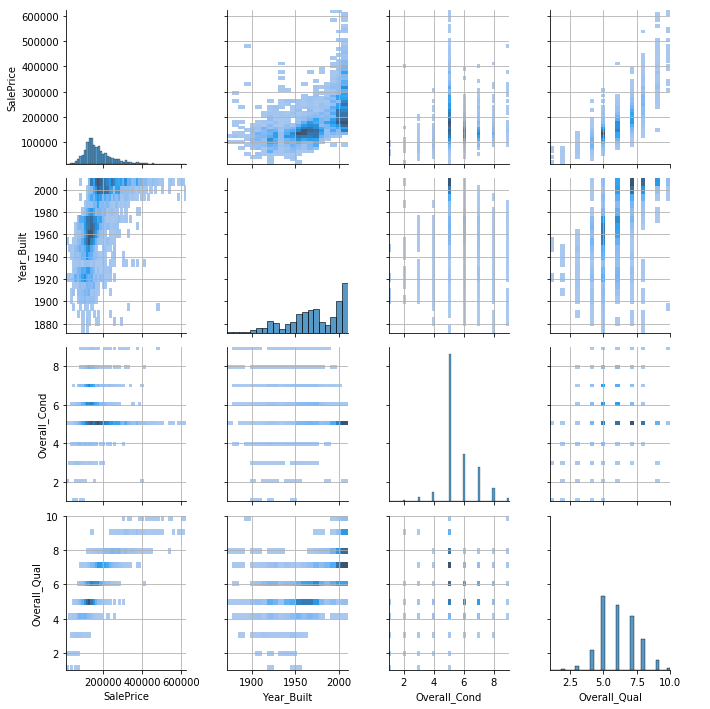

In [14]:
sns.pairplot(smaller_df[["SalePrice","Year_Built","Overall_Cond","Overall_Qual"]],kind="hist")

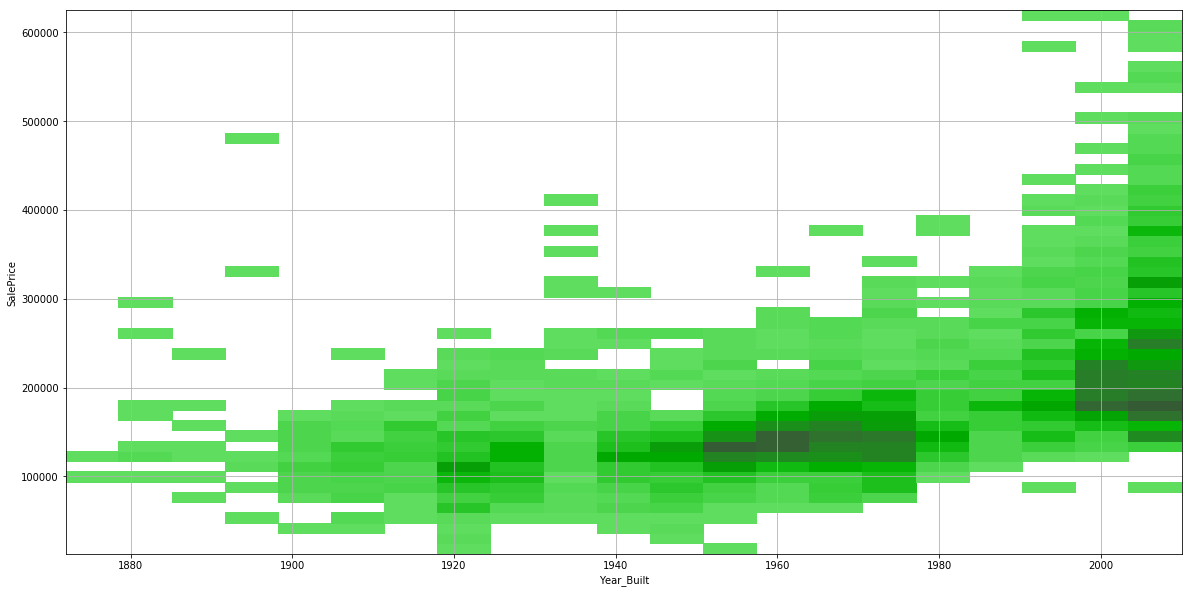

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(x="Year_Built", y="SalePrice", data=smaller_df, color="green")


(array([  1.,  10.,  64., 127., 126.,  93.,  81.,  58.,  46.,  26.,  26.,
         23.,  17.,   9.,   9.,   5.,   1.,   5.,   1.,   4.]),
 array([ 84500., 111025., 137550., 164075., 190600., 217125., 243650.,
        270175., 296700., 323225., 349750., 376275., 402800., 429325.,
        455850., 482375., 508900., 535425., 561950., 588475., 615000.]),
 <a list of 20 Patch objects>)

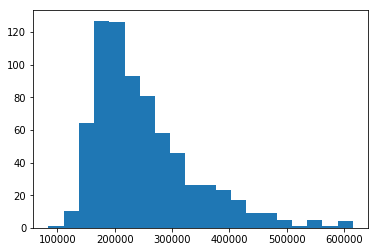

In [18]:
sp_2000 = df[df.Year_Built > 2000].SalePrice
plt.hist(sp_2000, bins=20)

In [19]:
sp_2000.quantile([0.25,0.5,0.75])

0.25    186950.00
0.50    226600.00
0.75    290235.25
Name: SalePrice, dtype: float64

## Standardized variables

In [31]:
def add_standardized(col_to_std:str, group_col:str, data:pd.DataFrame):
    mean = data.groupby(group_col)[col_to_std].transform(lambda x: x.mean())
    std = data.groupby(group_col)[col_to_std].transform(lambda x: x.std())
    std.fillna(1)
    data[col_to_std+"_std"] = (data[col_to_std] - mean)/std


In [32]:
pd.options.display.max_rows = 4000
add_standardized("SalePrice","Year_Built", smaller_df)

In [33]:
smaller_df.head()

,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Gr_Liv_Area,Full_Bath,Bedroom_AbvGr,Fireplaces,Garage_Cars,SalePrice,Year_Built_std,SalePrice_std
0,31770,6,5,1960,1656,1,3,2,2.0,215000,1.986718,1.986718
1,11622,5,6,1961,896,1,2,0,1.0,105000,-1.433660,-1.433660
2,14267,6,6,1958,1329,1,3,0,1.0,172000,0.750034,0.750034
3,11160,7,5,1968,2110,2,3,2,2.0,244000,2.574242,2.574242
4,13830,5,5,1997,1629,2,3,1,2.0,189900,-0.478525,-0.478525


## ScikitLearn

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
pf = PolynomialFeatures(degree=2)

In [44]:
pf =pf.fit(smaller_df[["Lot_Area","Overall_Qual"]], smaller_df.SalePrice)
pf.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [45]:
pf.transform(smaller_df[["Lot_Area","Overall_Qual"]])

array([[1.00000000e+00, 3.17700000e+04, 6.00000000e+00, 1.00933290e+09,
        1.90620000e+05, 3.60000000e+01],
       [1.00000000e+00, 1.16220000e+04, 5.00000000e+00, 1.35070884e+08,
        5.81100000e+04, 2.50000000e+01],
       [1.00000000e+00, 1.42670000e+04, 6.00000000e+00, 2.03547289e+08,
        8.56020000e+04, 3.60000000e+01],
       ...,
       [1.00000000e+00, 1.04410000e+04, 5.00000000e+00, 1.09014481e+08,
        5.22050000e+04, 2.50000000e+01],
       [1.00000000e+00, 1.00100000e+04, 5.00000000e+00, 1.00200100e+08,
        5.00500000e+04, 2.50000000e+01],
       [1.00000000e+00, 9.62700000e+03, 7.00000000e+00, 9.26791290e+07,
        6.73890000e+04, 4.90000000e+01]])

In [41]:
smaller_df[["Lot_Area","Overall_Qual"]]

,Lot_Area,Overall_Qual
0,31770,6
1,11622,5
2,14267,6
3,11160,7
4,13830,5
5,9978,6
6,4920,8
7,5005,8
8,5389,8
9,7500,7
